# 第3章: A Review of Statistics using R（統計学の復習）練習問題

この章では推定、仮説検定、信頼区間について学びます。

---
## 問題1: 点推定

以下のデータは、ある工場で生産された製品の重量（g）です。

```r
weights <- c(102, 98, 105, 101, 99, 103, 97, 104, 100, 102, 98, 101)
```

1. 母平均 μ の点推定値（標本平均）を計算してください
2. 母分散 σ² の不偏推定量（標本分散）を計算してください
3. 標本平均の標準誤差を計算してください

In [1]:
# 問題1の解答欄
weights <- c(102, 98, 105, 101, 99, 103, 97, 104, 100, 102, 98, 101)



### 模範解答

In [2]:
# 模範解答
weights <- c(102, 98, 105, 101, 99, 103, 97, 104, 100, 102, 98, 101)
n <- length(weights)

# 1. 点推定値（標本平均）
sample_mean <- mean(weights)
cat("標本平均 x̄ =", sample_mean, "g\n")

# 2. 不偏分散（標本分散）
sample_var <- var(weights)  # Rのvar()は不偏分散
cat("標本分散 s² =", sample_var, "\n")

# 3. 標本平均の標準誤差
se <- sd(weights) / sqrt(n)
cat("標準誤差 SE =", se, "g\n")

標本平均 x̄ = 100.8333 g


標本分散 s² = 6.333333 


標準誤差 SE = 0.7264832 g


---
## 問題2: 母平均の仮説検定（両側検定）

ある大学の学生の平均身長は170cmであると主張されています。
25人の学生をランダムに抽出したところ、標本平均は172cm、標本標準偏差は8cmでした。

有意水準5%で、母平均が170cmかどうかを検定してください。

1. 帰無仮説と対立仮説を設定
2. t統計量を計算
3. p値を計算
4. 結論を述べる

In [3]:
# 問題2の解答欄



### 模範解答

In [4]:
# 模範解答
# 与えられた値
mu0 <- 170      # 帰無仮説の下での母平均
x_bar <- 172    # 標本平均
s <- 8          # 標本標準偏差
n <- 25         # サンプルサイズ
alpha <- 0.05   # 有意水準

# 1. 仮説
cat("H0: μ = 170 (帰無仮説)\n")
cat("H1: μ ≠ 170 (対立仮説: 両側検定)\n\n")

# 2. t統計量
se <- s / sqrt(n)
t_stat <- (x_bar - mu0) / se
cat("t統計量 =", t_stat, "\n")

# 3. p値（両側検定）
df <- n - 1
p_value <- 2 * (1 - pt(abs(t_stat), df = df))
cat("p値 =", p_value, "\n\n")

# 臨界値
t_critical <- qt(1 - alpha/2, df = df)
cat("臨界値: ±", t_critical, "\n\n")

# 4. 結論
if (p_value < alpha) {
  cat("結論: p値 =", p_value, "<", alpha, "なので、帰無仮説を棄却する\n")
  cat("母平均は170cmとは有意に異なる\n")
} else {
  cat("結論: p値 =", p_value, ">=", alpha, "なので、帰無仮説を棄却できない\n")
  cat("母平均が170cmであるという主張を否定する十分な証拠がない\n")
}

H0: μ = 170 (帰無仮説)


H1: μ ≠ 170 (対立仮説: 両側検定)



t統計量 = 1.25 


p値 = 0.2233515 



臨界値: ± 2.063899 



結論: p値 = 0.2233515 >= 0.05 なので、帰無仮説を棄却できない
母平均が170cmであるという主張を否定する十分な証拠がない


---
## 問題3: 母平均の仮説検定（片側検定）

ある薬の効果により、血圧が下がると期待されています。
16人の患者に薬を投与したところ、血圧の変化（投与前 - 投与後）の
標本平均は5mmHg、標本標準偏差は10mmHgでした。

有意水準5%で、この薬が血圧を下げる効果があるかを検定してください。

1. 適切な帰無仮説と対立仮説を設定（片側検定）
2. t統計量を計算
3. p値を計算
4. 結論を述べる

In [5]:
# 問題3の解答欄



### 模範解答

In [6]:
# 模範解答
# 与えられた値
mu0 <- 0        # 帰無仮説: 変化なし
x_bar <- 5      # 標本平均（血圧低下）
s <- 10         # 標本標準偏差
n <- 16         # サンプルサイズ
alpha <- 0.05   # 有意水準

# 1. 仮説（片側検定：血圧が下がるかどうか）
cat("H0: μ ≤ 0 (帰無仮説: 薬の効果なし)\n")
cat("H1: μ > 0 (対立仮説: 血圧を下げる効果あり)\n\n")

# 2. t統計量
se <- s / sqrt(n)
t_stat <- (x_bar - mu0) / se
cat("t統計量 =", t_stat, "\n")

# 3. p値（右側検定）
df <- n - 1
p_value <- 1 - pt(t_stat, df = df)
cat("p値 =", p_value, "\n\n")

# 臨界値（右側）
t_critical <- qt(1 - alpha, df = df)
cat("臨界値:", t_critical, "\n\n")

# 4. 結論
if (p_value < alpha) {
  cat("結論: p値 =", p_value, "<", alpha, "なので、帰無仮説を棄却する\n")
  cat("この薬には血圧を下げる効果があると言える\n")
} else {
  cat("結論: p値 =", p_value, ">=", alpha, "なので、帰無仮説を棄却できない\n")
  cat("この薬に血圧を下げる効果があるとは言えない\n")
}

H0: μ ≤ 0 (帰無仮説: 薬の効果なし)


H1: μ > 0 (対立仮説: 血圧を下げる効果あり)



t統計量 = 2 


p値 = 0.0319725 



臨界値: 1.75305 



結論: p値 = 0.0319725 < 0.05 なので、帰無仮説を棄却する
この薬には血圧を下げる効果があると言える


---
## 問題4: 信頼区間の構成

問題1のデータを使って、母平均 μ の95%信頼区間を構成してください。

```r
weights <- c(102, 98, 105, 101, 99, 103, 97, 104, 100, 102, 98, 101)
```

1. 手計算で95%信頼区間を求める
2. t.test()関数を使って確認する

In [7]:
# 問題4の解答欄



### 模範解答

In [8]:
# 模範解答
weights <- c(102, 98, 105, 101, 99, 103, 97, 104, 100, 102, 98, 101)
n <- length(weights)
x_bar <- mean(weights)
s <- sd(weights)
se <- s / sqrt(n)
alpha <- 0.05

# 1. 手計算
df <- n - 1
t_critical <- qt(1 - alpha/2, df = df)

lower_bound <- x_bar - t_critical * se
upper_bound <- x_bar + t_critical * se

cat("=== 手計算 ===", "\n")
cat("標本平均 x̄ =", x_bar, "\n")
cat("標準誤差 SE =", se, "\n")
cat("臨界値 t_0.025,11 =", t_critical, "\n")
cat("95%信頼区間: [", lower_bound, ",", upper_bound, "]\n\n")

# 2. t.test()関数を使用
cat("=== t.test()関数 ===", "\n")
result <- t.test(weights, conf.level = 0.95)
print(result)

=== 手計算 === 


標本平均 x̄ = 100.8333 


標準誤差 SE = 0.7264832 


臨界値 t_0.025,11 = 2.200985 


95%信頼区間: [ 99.23435 , 102.4323 ]



=== t.test()関数 === 



	One Sample t-test

data:  weights
t = 138.8, df = 11, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  99.23435 102.43231
sample estimates:
mean of x 
 100.8333 



---
## 問題5: 2群の平均の比較（独立標本）

2つの教授法AとBの効果を比較するため、学生をランダムに2群に分けて試験を行いました。

```r
group_A <- c(78, 85, 72, 80, 88, 76, 82, 79, 84, 77)
group_B <- c(82, 90, 85, 88, 91, 84, 87, 89, 86, 83)
```

有意水準5%で、2群の平均に差があるかを検定してください。

In [9]:
# 問題5の解答欄



### 模範解答

In [10]:
# 模範解答
group_A <- c(78, 85, 72, 80, 88, 76, 82, 79, 84, 77)
group_B <- c(82, 90, 85, 88, 91, 84, 87, 89, 86, 83)

# 基本統計量
cat("=== 基本統計量 ===", "\n")
cat("Group A: 平均 =", mean(group_A), ", SD =", sd(group_A), "\n")
cat("Group B: 平均 =", mean(group_B), ", SD =", sd(group_B), "\n\n")

# 2標本t検定（Welchのt検定）
cat("=== Welchのt検定 ===", "\n")
result <- t.test(group_A, group_B, var.equal = FALSE)
print(result)

# 結論
cat("\n=== 結論 ===", "\n")
if (result$p.value < 0.05) {
  cat("p値 =", result$p.value, "< 0.05 なので、帰無仮説を棄却\n")
  cat("2つの教授法には有意な差がある\n")
} else {
  cat("p値 =", result$p.value, ">= 0.05 なので、帰無仮説を棄却できない\n")
  cat("2つの教授法に有意な差があるとは言えない\n")
}

=== 基本統計量 === 


Group A: 平均 = 80.1 , SD = 4.748099 


Group B: 平均 = 86.5 , SD = 3.02765 



=== Welchのt検定 === 



	Welch Two Sample t-test

data:  group_A and group_B
t = -3.594, df = 15.281, p-value = 0.00259
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.189543  -2.610457
sample estimates:
mean of x mean of y 
     80.1      86.5 




=== 結論 === 


p値 = 0.002590071 < 0.05 なので、帰無仮説を棄却
2つの教授法には有意な差がある


---
## 問題6: 対応のある標本のt検定

8人の被験者に対して、ダイエットプログラムの前後で体重を測定しました。

```r
before <- c(75, 82, 68, 91, 78, 85, 72, 80)
after <- c(72, 78, 67, 87, 75, 82, 70, 77)
```

有意水準5%で、ダイエットプログラムが有効かどうかを検定してください。

In [11]:
# 問題6の解答欄



### 模範解答

In [12]:
# 模範解答
before <- c(75, 82, 68, 91, 78, 85, 72, 80)
after <- c(72, 78, 67, 87, 75, 82, 70, 77)

# 差を計算
difference <- before - after
cat("体重の減少量:\n")
print(difference)
cat("\n平均減少量:", mean(difference), "kg\n\n")

# 対応のあるt検定（片側検定：体重が減少したかどうか）
cat("=== 対応のあるt検定 ===", "\n")
result <- t.test(before, after, paired = TRUE, alternative = "greater")
print(result)

# 結論
cat("\n=== 結論 ===", "\n")
if (result$p.value < 0.05) {
  cat("p値 =", result$p.value, "< 0.05 なので、帰無仮説を棄却\n")
  cat("ダイエットプログラムは有効（体重が有意に減少）\n")
} else {
  cat("p値 =", result$p.value, ">= 0.05 なので、帰無仮説を棄却できない\n")
  cat("ダイエットプログラムが有効とは言えない\n")
}

体重の減少量:


[1] 3 4 1 4 3 3 2 3



平均減少量: 2.875 kg



=== 対応のあるt検定 === 



	Paired t-test

data:  before and after
t = 8.2053, df = 7, p-value = 3.875e-05
alternative hypothesis: true mean difference is greater than 0
95 percent confidence interval:
 2.211173      Inf
sample estimates:
mean difference 
          2.875 




=== 結論 === 


p値 = 3.875228e-05 < 0.05 なので、帰無仮説を棄却
ダイエットプログラムは有効（体重が有意に減少）


---
## 問題7: 第一種の過誤と第二種の過誤

シミュレーションを通じて、第一種の過誤（偽陽性）と有意水準の関係を確認します。

1. 真の母平均 μ = 100、標準偏差 σ = 15 の正規分布から、サンプルサイズ n = 30 の標本を抽出
2. 帰無仮説 H0: μ = 100 を検定（有意水準5%）
3. これを10000回繰り返し、帰無仮説を棄却した割合を計算
4. この割合は有意水準に近いはずです。確認してください。

In [13]:
# 問題7の解答欄



### 模範解答

In [14]:
# 模範解答
set.seed(123)
n_simulations <- 10000
n <- 30
mu <- 100
sigma <- 15
alpha <- 0.05

# 帰無仮説を棄却した回数をカウント
reject_count <- 0

for (i in 1:n_simulations) {
  sample_data <- rnorm(n, mean = mu, sd = sigma)
  test_result <- t.test(sample_data, mu = mu)
  
  if (test_result$p.value < alpha) {
    reject_count <- reject_count + 1
  }
}

# 棄却率（第一種の過誤の発生率）
rejection_rate <- reject_count / n_simulations

cat("=== シミュレーション結果 ===", "\n")
cat("シミュレーション回数:", n_simulations, "\n")
cat("帰無仮説が真の場合に棄却した回数:", reject_count, "\n")
cat("第一種の過誤の発生率:", rejection_rate, "\n")
cat("設定した有意水準:", alpha, "\n\n")
cat("→ 第一種の過誤の発生率は有意水準に近い値となる\n")

=== シミュレーション結果 === 


シミュレーション回数: 10000 


帰無仮説が真の場合に棄却した回数: 465 


第一種の過誤の発生率: 0.0465 


設定した有意水準: 0.05 



→ 第一種の過誤の発生率は有意水準に近い値となる


---
## 問題8: 検定力（Power）のシミュレーション

真の母平均が帰無仮説とは異なる場合の検定力を確認します。

1. 真の母平均 μ = 105（帰無仮説は μ = 100）、標準偏差 σ = 15 の正規分布から標本を抽出
2. サンプルサイズ n = 30, 50, 100 のそれぞれについて、検定力を計算
3. サンプルサイズと検定力の関係をグラフで表示

In [15]:
# 問題8の解答欄



### 模範解答

  サンプルサイズ 検定力
1             10 0.1596
2             20 0.2946
3             30 0.4228
4             50 0.6270
5             75 0.8109
6            100 0.9079
7            150 0.9793


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <a2>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(...):
“conversion failure on 'サンプルサイズと検定力の関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in title(...):
“conversion failure on '検定力' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in text.default(x, y, ...):
“conversion failure on '検定力 = 0.8' in 'mbcsToSbcs': dot substituted for <9b>”


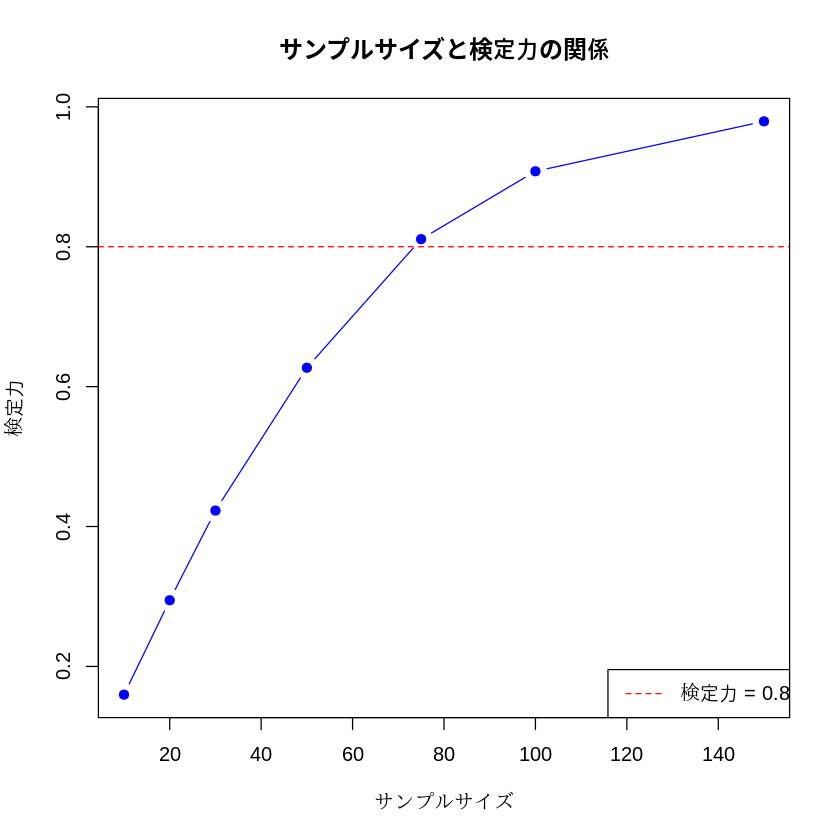

In [16]:
# 模範解答
set.seed(123)
n_simulations <- 10000
mu_true <- 105      # 真の母平均
mu0 <- 100          # 帰無仮説の値
sigma <- 15
alpha <- 0.05

sample_sizes <- c(10, 20, 30, 50, 75, 100, 150)
power_values <- numeric(length(sample_sizes))

for (j in 1:length(sample_sizes)) {
  n <- sample_sizes[j]
  reject_count <- 0
  
  for (i in 1:n_simulations) {
    sample_data <- rnorm(n, mean = mu_true, sd = sigma)
    test_result <- t.test(sample_data, mu = mu0)
    
    if (test_result$p.value < alpha) {
      reject_count <- reject_count + 1
    }
  }
  
  power_values[j] <- reject_count / n_simulations
}

# 結果の表示
results <- data.frame(
  サンプルサイズ = sample_sizes,
  検定力 = power_values
)
print(results)

# グラフの作成
plot(sample_sizes, power_values, type = "b",
     main = "サンプルサイズと検定力の関係",
     xlab = "サンプルサイズ",
     ylab = "検定力",
     pch = 19, col = "blue")
abline(h = 0.8, col = "red", lty = 2)
legend("bottomright", "検定力 = 0.8", col = "red", lty = 2)

---
## 問題9: p値の解釈

以下のシナリオについて、p値の正しい解釈を選んでください。

「ある新薬の効果を検定したところ、p値 = 0.03 が得られました。」

1. この結果が正しい解釈を以下から選んでください：
   - A: 新薬が効果がない確率は3%である
   - B: 帰無仮説が真であるとき、このデータまたはより極端なデータが得られる確率は3%である
   - C: 新薬が効果がある確率は97%である
   - D: このデータが得られたので、帰無仮説が真である確率は3%である

2. Rでシミュレーションを行い、p値の意味を視覚的に確認してください

In [17]:
# 問題9の解答欄



### 模範解答

正解: B


p値の正しい解釈:


『帰無仮説が真であるとき、このデータまたはより極端なデータが得られる確率は3%である』



Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <84>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのp値の分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'p値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'p値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'p値' in 'mbcsToSbcs': dot substituted for <a4>”



p値 < 0.05 の割合: 0.0465 


→ 帰無仮説が真のとき、p値は一様分布に従う


→ 約5%のケースでp値 < 0.05 となる（第一種の過誤）


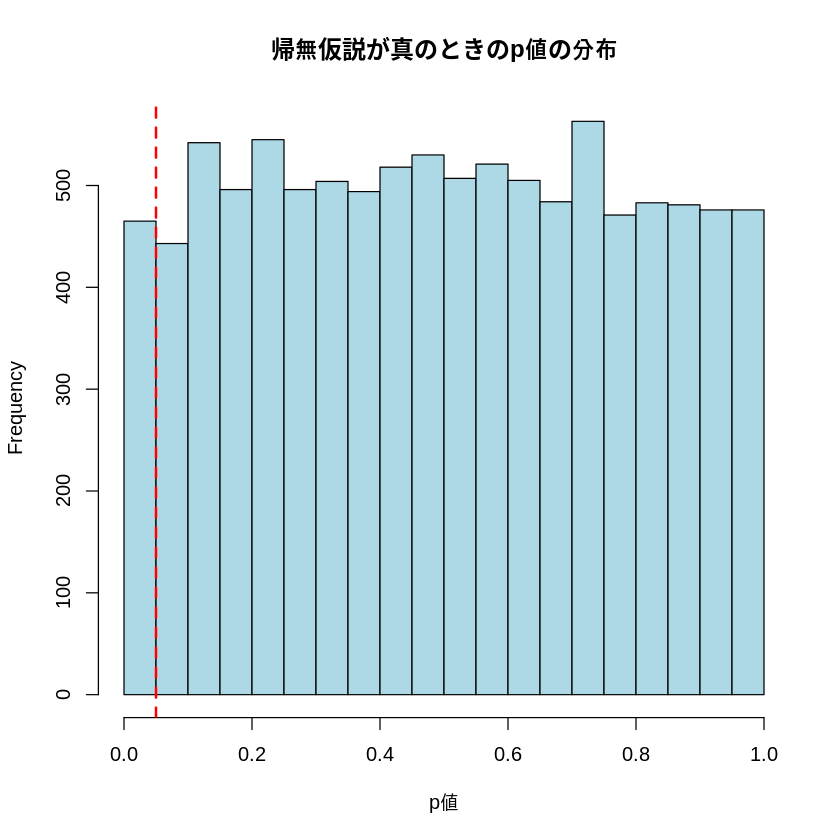

In [18]:
# 模範解答
# 1. 正解: B
cat("正解: B\n")
cat("p値の正しい解釈:\n")
cat("『帰無仮説が真であるとき、このデータまたはより極端なデータが得られる確率は3%である』\n\n")

# 2. シミュレーションでの確認
set.seed(123)
n_simulations <- 10000
n <- 30
mu0 <- 0  # 帰無仮説: 効果なし

# 帰無仮説が真の場合（効果なし）のp値の分布
p_values <- numeric(n_simulations)

for (i in 1:n_simulations) {
  sample_data <- rnorm(n, mean = mu0, sd = 1)  # 帰無仮説が真
  test_result <- t.test(sample_data, mu = mu0)
  p_values[i] <- test_result$p.value
}

# p値のヒストグラム
hist(p_values, breaks = 20,
     main = "帰無仮説が真のときのp値の分布",
     xlab = "p値",
     col = "lightblue")
abline(v = 0.05, col = "red", lwd = 2, lty = 2)

cat("\np値 < 0.05 の割合:", mean(p_values < 0.05), "\n")
cat("→ 帰無仮説が真のとき、p値は一様分布に従う\n")
cat("→ 約5%のケースでp値 < 0.05 となる（第一種の過誤）\n")

---
## 問題10: 信頼区間の被覆率

95%信頼区間が本当に95%の確率で真の母数を含むかをシミュレーションで確認します。

1. 真の母平均 μ = 50、標準偏差 σ = 10 の正規分布から、サンプルサイズ n = 20 の標本を抽出
2. 95%信頼区間を構成
3. これを10000回繰り返し、信頼区間が真の母平均を含む割合を計算
4. 最初の100個の信頼区間を可視化

In [19]:
# 問題10の解答欄



### 模範解答

=== 被覆率の確認 === 


95%信頼区間が真の母平均を含む割合: 0.9486 


期待される割合: 0.95



Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <93>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <9d>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '95%信頼区間の可視化（最初の100個）' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(...):
“conversion failure on '値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <a5>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <a7>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on 'シミュレーション番号' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <9d>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <84>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <9d>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の母平均を含む' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '含まない' in 'mbcsToSbcs': dot substituted for <84>”


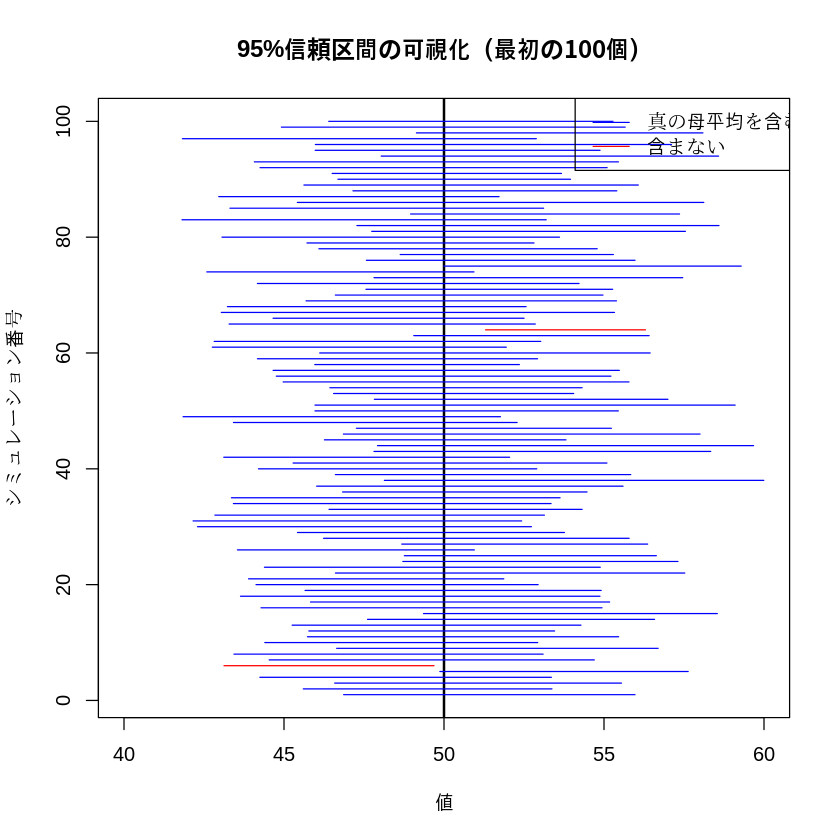

In [20]:
# 模範解答
set.seed(123)
n_simulations <- 10000
n <- 20
mu <- 50
sigma <- 10

# 信頼区間の上限と下限を格納
lower_bounds <- numeric(n_simulations)
upper_bounds <- numeric(n_simulations)

for (i in 1:n_simulations) {
  sample_data <- rnorm(n, mean = mu, sd = sigma)
  ci <- t.test(sample_data)$conf.int
  lower_bounds[i] <- ci[1]
  upper_bounds[i] <- ci[2]
}

# 真の母平均を含む割合
coverage <- mean(lower_bounds <= mu & upper_bounds >= mu)
cat("=== 被覆率の確認 ===", "\n")
cat("95%信頼区間が真の母平均を含む割合:", coverage, "\n")
cat("期待される割合: 0.95\n\n")

# 最初の100個の信頼区間を可視化
n_plot <- 100
contains_mu <- (lower_bounds[1:n_plot] <= mu) & (upper_bounds[1:n_plot] >= mu)
colors <- ifelse(contains_mu, "blue", "red")

plot(1, type = "n", xlim = c(40, 60), ylim = c(1, n_plot),
     main = "95%信頼区間の可視化（最初の100個）",
     xlab = "値", ylab = "シミュレーション番号")
abline(v = mu, col = "black", lwd = 2)

for (i in 1:n_plot) {
  segments(lower_bounds[i], i, upper_bounds[i], i, col = colors[i])
}

legend("topright", 
       legend = c("真の母平均を含む", "含まない"),
       col = c("blue", "red"), lty = 1)